## Języki skryptowe w analizie danych
### Projekt 1, język Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'sustainable_fashion_trends_2024.csv')

Analiza bazy

In [3]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 

In [5]:
df.isna().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

In [6]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [7]:
numeric_cols = ['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD']
df[numeric_cols].describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2016.956200,250.317550,2.517862e+06,50107.304048,10.431200,259.354216
std,4.347466,142.802345,1.429043e+06,28746.381115,5.706573,137.730976
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.615000,1.293087e+06,25340.802500,5.000000,142.865000
50%,2017.000000,250.650000,2.499096e+06,50466.340000,10.000000,258.615000
75%,2021.000000,372.255000,3.763860e+06,74984.650000,15.000000,378.595000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.940000


Wizualizacja podstawowych wartości bazy

In [8]:
PALETTE = "crest" #jak będziesz chciała zmienić palete to ustaw tu z sns żeby się łatwo wszędzie zmieniało

In [9]:
sns.set_palette(PALETTE)

In [10]:
countries = df['Country'].value_counts()

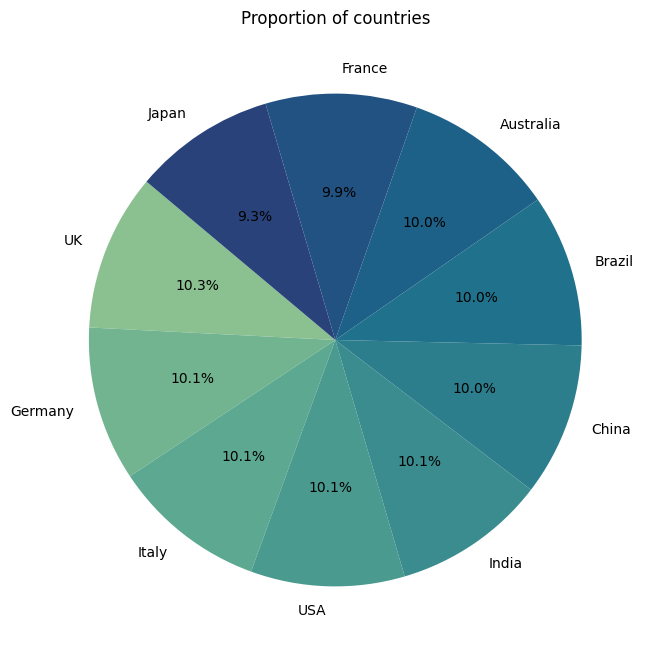

In [11]:
colors = sns.color_palette(PALETTE, 10)
plt.figure(figsize=(8, 8))
plt.pie(countries, labels=countries.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of countries')
plt.show()

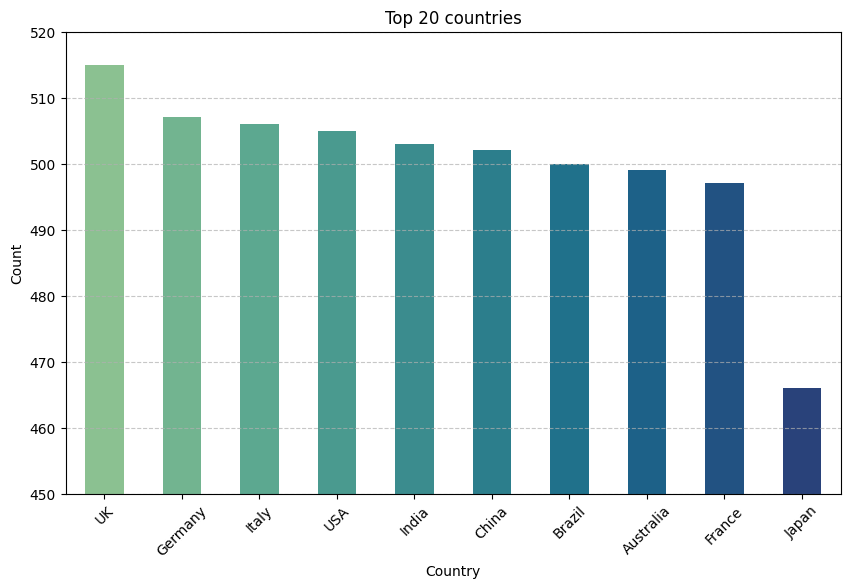

In [12]:
plt.figure(figsize=(10, 6))
df['Country'].value_counts().head(20).plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=10))
plt.title('Top 20 countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ylim(450,520)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

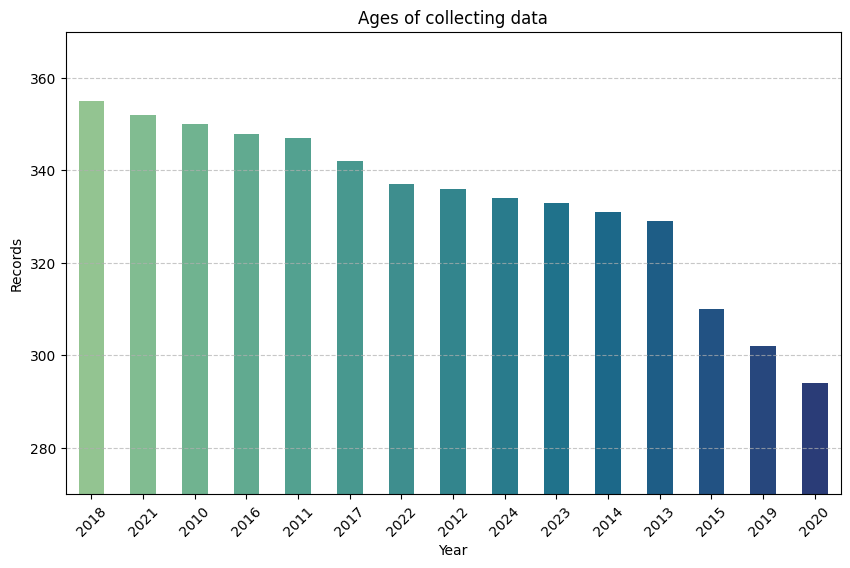

In [13]:
plt.figure(figsize=(10, 6))
df['Year'].value_counts().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=15))
plt.title('Ages of collecting data')
plt.xlabel('Year')
plt.ylabel('Records')
plt.ylim(270,370)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

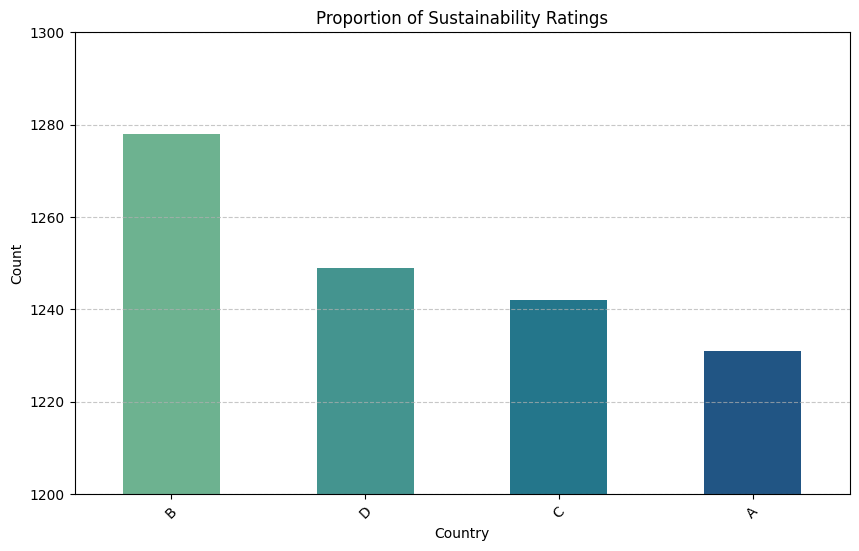

In [14]:
plt.figure(figsize=(10, 6))
df['Sustainability_Rating'].value_counts().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Proportion of Sustainability Ratings')
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim(1200,1300)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

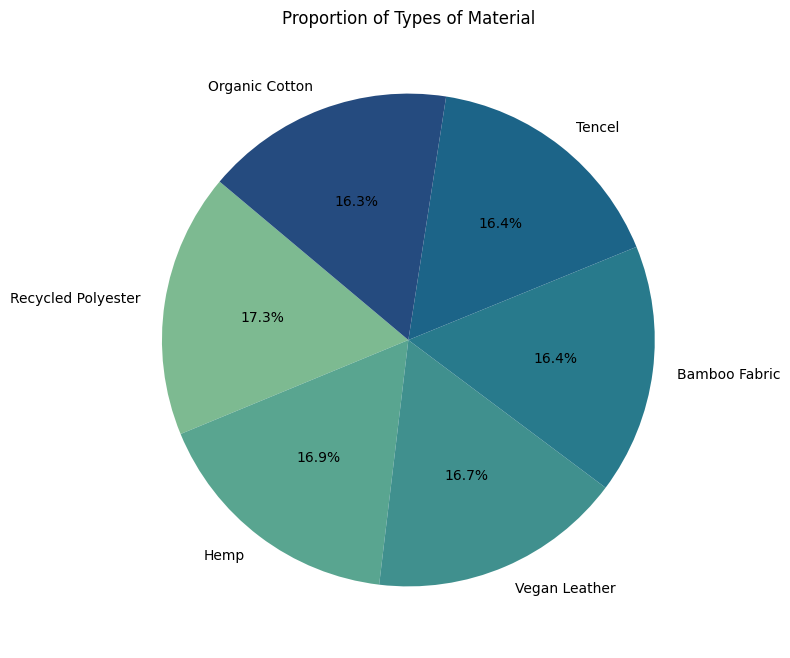

In [15]:
material = df['Material_Type'].value_counts()
colors = sns.color_palette(PALETTE, 6)
plt.figure(figsize=(8, 8))
plt.pie(material, labels=material.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Types of Material')
plt.show()

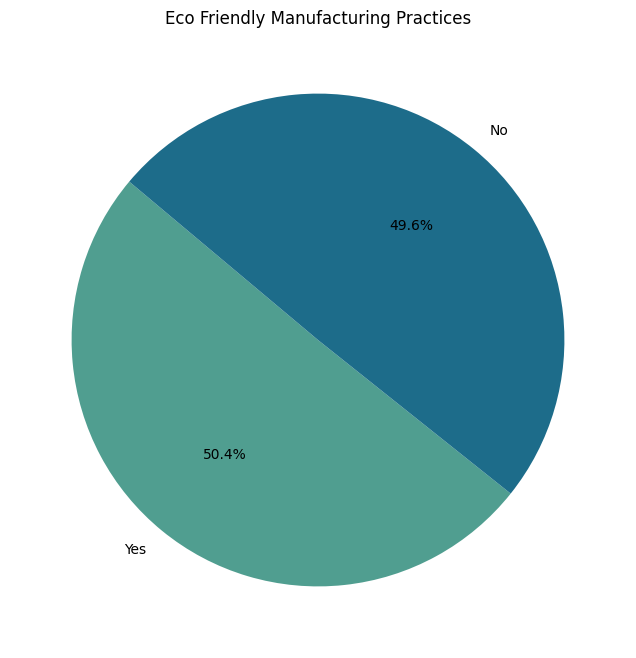

In [16]:
manufacturing = df['Eco_Friendly_Manufacturing'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Eco Friendly Manufacturing Practices')
plt.show()

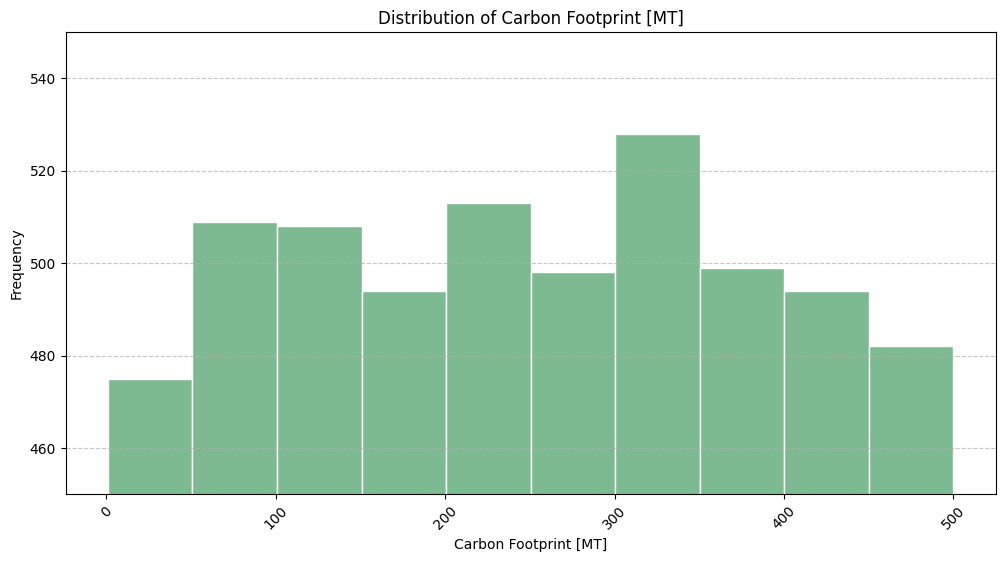

In [17]:
plt.figure(figsize=(12, 6))
df['Carbon_Footprint_MT'].plot(kind='hist', edgecolor='white')
plt.title('Distribution of Carbon Footprint [MT]')
plt.xlabel('Carbon Footprint [MT]')
plt.ylabel('Frequency')
plt.ylim(450,550)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

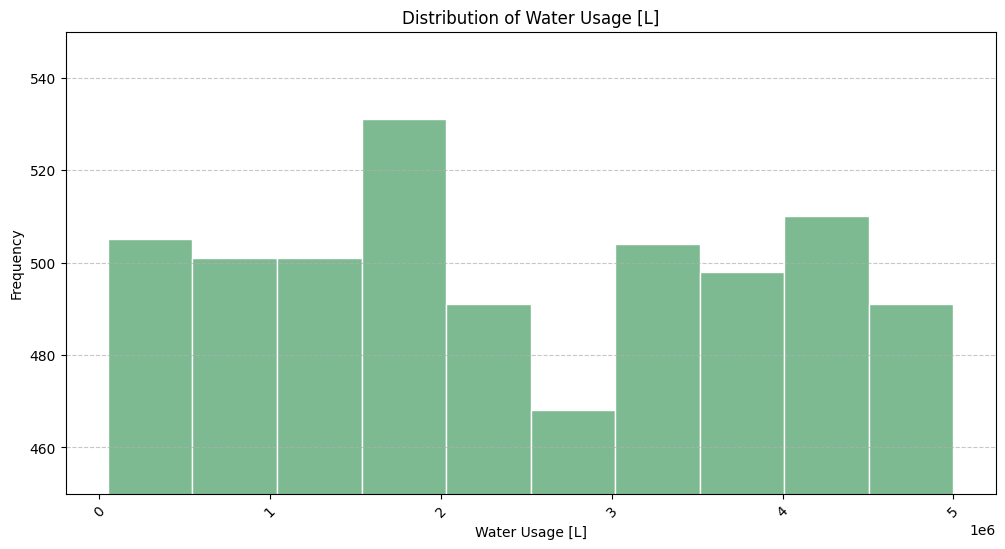

In [18]:
plt.figure(figsize=(12, 6))
df['Water_Usage_Liters'].plot(kind='hist', edgecolor='white')
plt.title('Distribution of Water Usage [L]')
plt.xlabel('Water Usage [L]')
plt.ylabel('Frequency')
plt.ylim(450,550)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

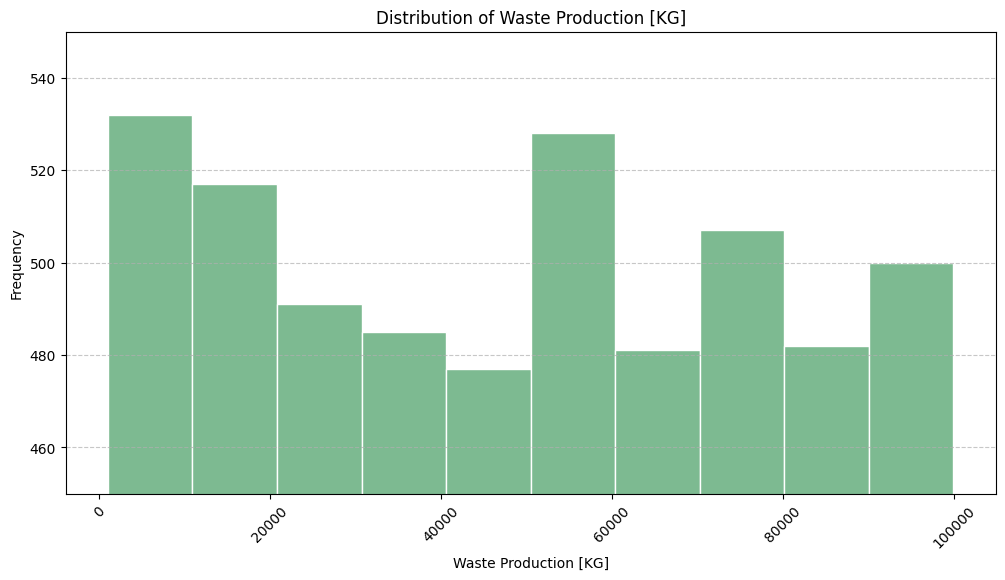

In [19]:
plt.figure(figsize=(12, 6))
df['Waste_Production_KG'].plot(kind='hist', edgecolor='white')
plt.title('Distribution of Waste Production [KG]')
plt.xlabel('Waste Production [KG]')
plt.ylabel('Frequency')
plt.ylim(450,550)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

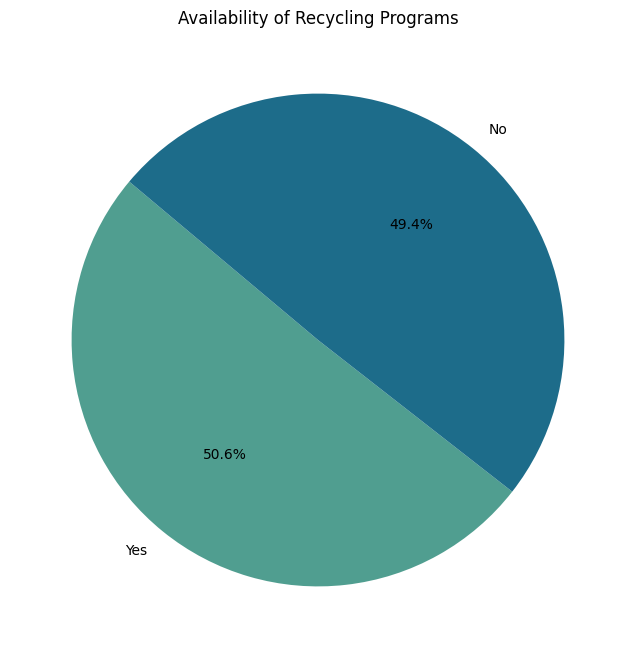

In [20]:
manufacturing = df['Recycling_Programs'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Availability of Recycling Programs')
plt.show()

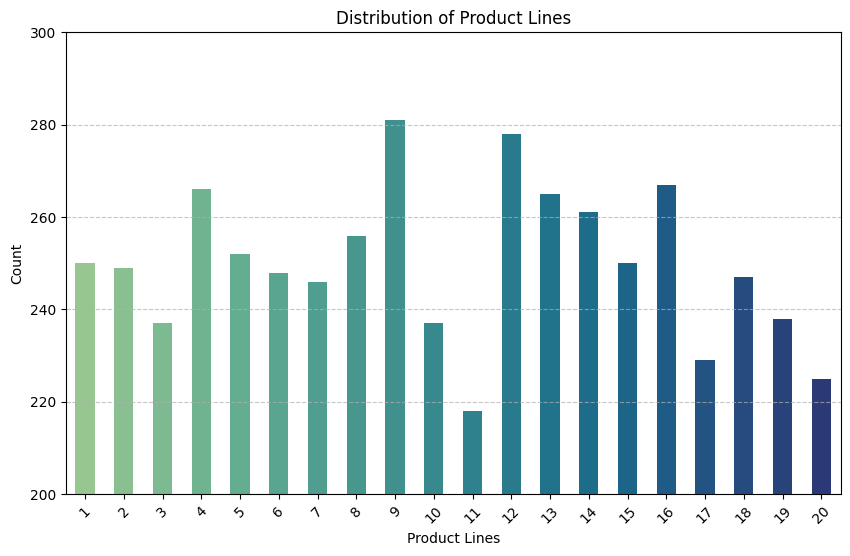

In [21]:
plt.figure(figsize=(10, 6))
df['Product_Lines'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=20))
plt.title('Distribution of Product Lines')
plt.xlabel('Product Lines')
plt.ylabel('Count')
plt.ylim(200,300)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

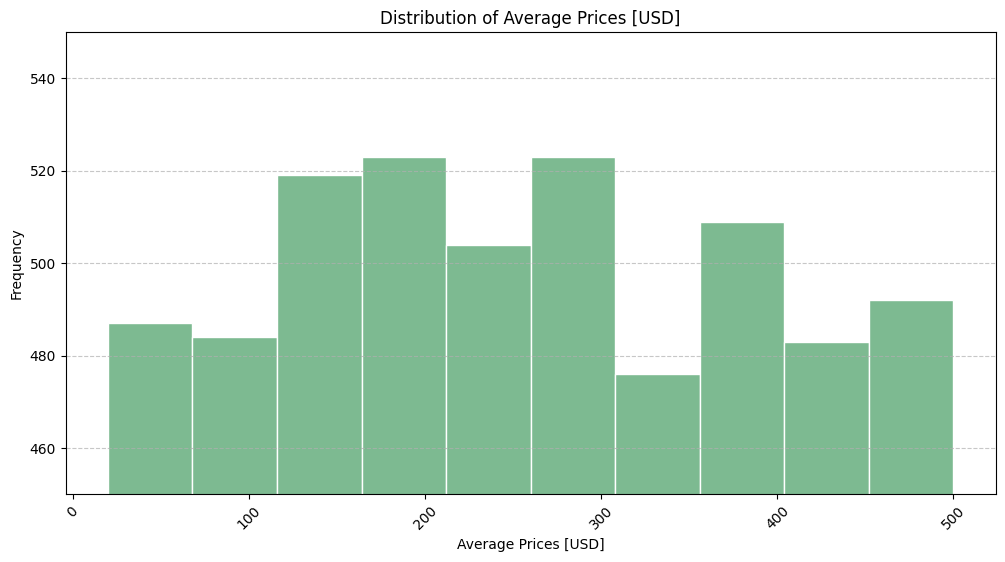

In [22]:
plt.figure(figsize=(12, 6))
df['Average_Price_USD'].plot(kind='hist', edgecolor='white')
plt.title('Distribution of Average Prices [USD]')
plt.xlabel('Average Prices [USD]')
plt.ylabel('Frequency')
plt.ylim(450,550)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

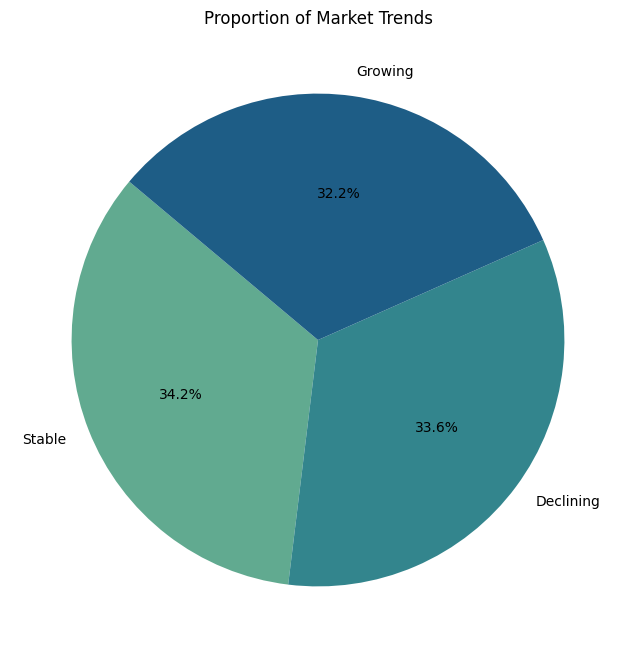

In [23]:
market = df['Market_Trend'].value_counts()
colors = sns.color_palette(PALETTE, 3)
plt.figure(figsize=(8, 8))
plt.pie(market, labels=market.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proportion of Market Trends')
plt.show()

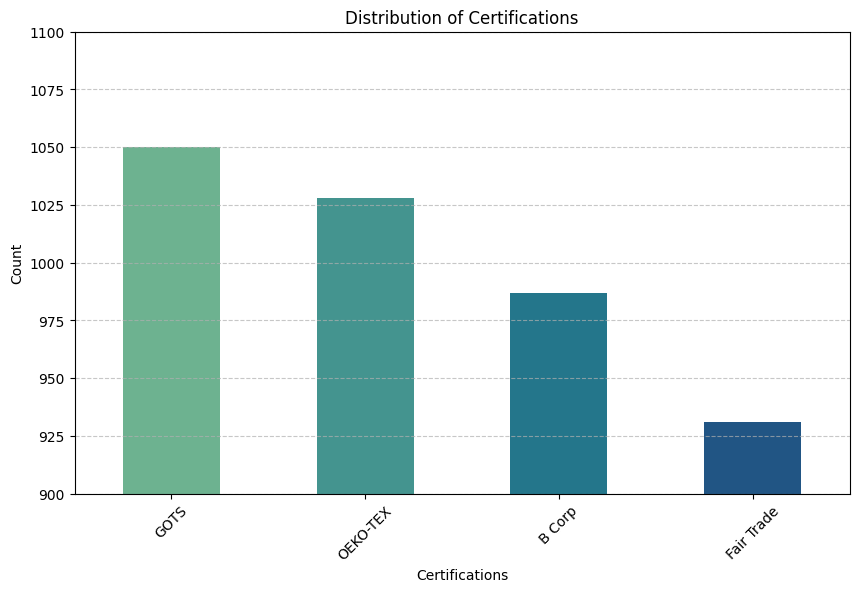

In [24]:
plt.figure(figsize=(10, 6))
df['Certifications'].value_counts().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Distribution of Certifications')
plt.xlabel('Certifications')
plt.ylabel('Count')
plt.ylim(900,1100)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()